In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Since we are going to make lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [3]:
house = pd.read_csv('./data/Maison.csv')
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [4]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})


house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [5]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
price,546.0,68121.597070,26702.670926,25000.0,49125.0,62000.0,82000.0,190000.0
area,546.0,5150.265568,2168.158725,1650.0,3600.0,4600.0,6360.0,16200.0
rooms,546.0,2.965201,0.737388,1.0,2.0,3.0,3.0,6.0
bathroom,546.0,1.285714,0.502158,1.0,1.0,1.0,2.0,4.0
floors,546.0,1.807692,0.868203,1.0,1.0,2.0,2.0,4.0
driveway,546.0,0.858974,0.348367,0.0,1.0,1.0,1.0,1.0
game_room,546.0,0.177656,0.382573,0.0,0.0,0.0,0.0,1.0
cellar,546.0,0.349817,0.477349,0.0,0.0,0.0,1.0,1.0
gas,546.0,0.045788,0.209216,0.0,0.0,0.0,0.0,1.0
air,546.0,0.316850,0.465675,0.0,0.0,0.0,1.0,1.0


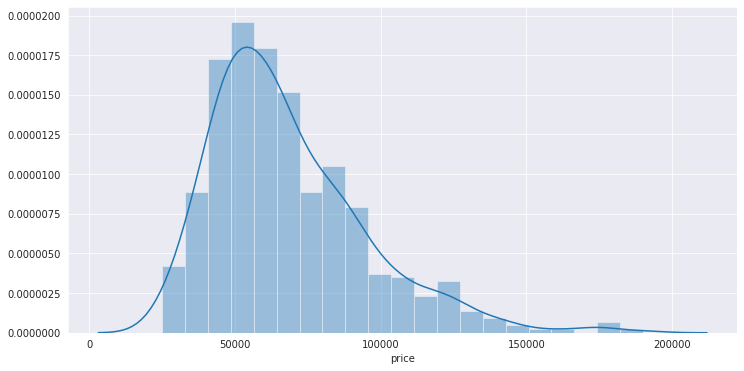

In [6]:
# Distribution of price
sns.distplot(house['price'])

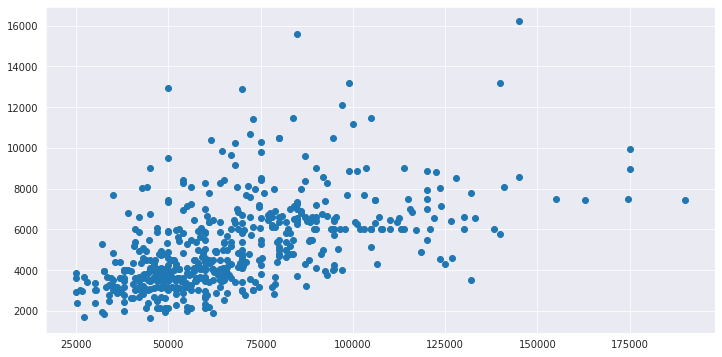

In [7]:
# Relation between price and area
plt.scatter(house['price'], house['area'])

In [8]:
# Skewness of game_room
house.skew()

price        1.209829
area         1.322758
rooms        0.495872
bathroom     1.592096
floors       1.074657
driveway    -2.068473
game_room    1.691334
cellar       0.631551
gas          4.358013
air          0.789493
garage       0.844808
situation    1.257189
dtype: float64

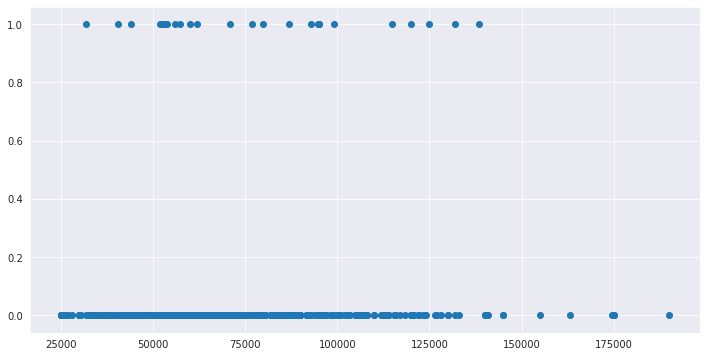

In [9]:
# S gas
plt.scatter(house['price'], house['gas'])

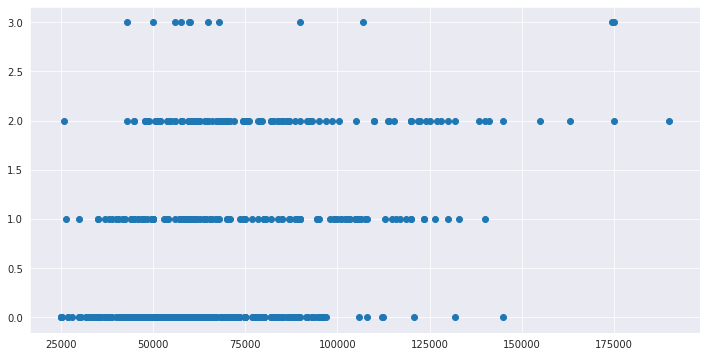

In [10]:
# Relation between price and gas
plt.scatter(house['price'], house['garage'])

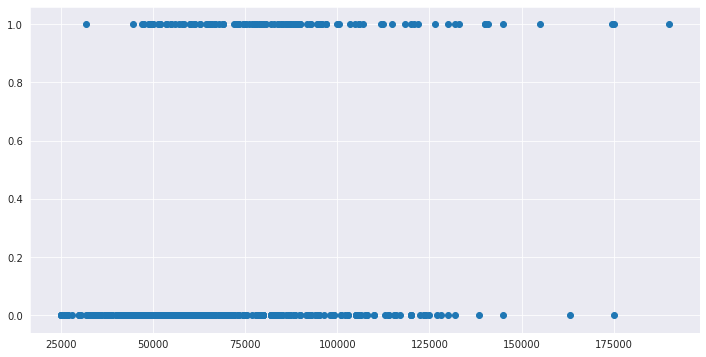

In [11]:
# Relation between price and gas
plt.scatter(house['price'], house['situation'])

In [12]:
# Drop Gas, Game Room and Situation
house.drop(['gas', 'game_room', 'driveway'], axis=1, inplace=True)

# Build Regression Model (using sklearn)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
lm = LinearRegression()

In [15]:
x = house[['area', 'rooms', 'bathroom', 'floors',
       'cellar', 'air', 'garage', 'situation']]

y = house['price']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
x_test.head()

,area,rooms,bathroom,floors,cellar,air,garage,situation
411,6500,3,2,3,0,1,0,1
498,8250,3,1,1,0,0,0,0
464,2145,3,1,3,0,0,0,1
256,4410,4,3,2,1,0,2,0
166,3410,3,1,2,0,1,0,0


In [18]:
# Build model using sklearn
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(pd.DataFrame(lm.coef_, x.columns, columns = ['Coefficients']))

           Coefficients
area           3.780397
rooms       1010.966289
bathroom   16952.340540
floors      7184.093950
cellar      6210.272213
air        11526.527899
garage      3894.779032
situation  10976.699040


In [20]:
predictions = lm.predict(x_test)

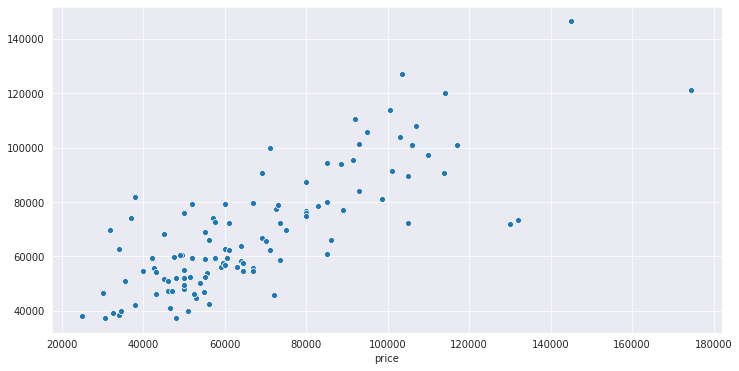

In [21]:
# check quality of model
sns.scatterplot(y_test, predictions)

In [22]:
# Evaluation metrics
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# Root Mean Squared Error(RMSE)
import numpy as np
from sklearn import metrics
print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 11746.517974549011
MSE : 272629938.964354
RMSE : 16511.509287898367


In [23]:
# Scored R-sqaure value
print("R-square =", lm.score(x, y))

R-square = 0.6506248996563437


# Build Regression Model (using statsmodel)

In [24]:
import statsmodels.api as sm

In [25]:
def constructOLSRegressor(x_train, y_train_endog):
    '''Constructs statsmodel OLS Regressor model'''
    # Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
    # Remember, we want to predict the price based off our features.
    # x represents our predictor variables, and y our predicted variable.
    # We need now to add manually the intercepts
    x_exog_train = sm.add_constant(x_train)
    res = sm.OLS(y_train_endog, x_exog_train)
    model = res.fit()
    return model

In [26]:
x = house[['area', 'rooms', 'bathroom', 'floors',
       'cellar', 'air', 'garage', 'situation']].values

y = house['price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = constructOLSRegressor(x_train, y_train)

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     81.66
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           3.08e-77
Time:                        09:55:37   Log-Likelihood:                -4233.8
No. Observations:                 382   AIC:                             8486.
Df Residuals:                     373   BIC:                             8521.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1628.1105   3962.004      0.411      0.681   -6162.553    9418.774
x1             3.4250      0.414      8.282      0.000       2.612       4.238
x2          1286.7785   1265.851      1.017      0.310   -1202.320    3775.877
x3          1.453e+04   1900.892      7.644      0.000    1.08e+04    1.83e+04
x4          7792.9515   1117.242      6.975      0.000    5596.069    9989.834
x5          7430.6669   1851.799      4.013      0.000    3789.393    1.11e+04
x6          1.109e+04   1854.263      5.983      0.000    7448.620    1.47e+04
x7          5536.4718   1062.567      5.210      0.000    3447.099    7625.844
x8          1.009e+04   2055.141      4.912      0.000    6053.033    1.41e+04
==============================================================================
Omnibus:                       67.965   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.012
Skew:                           0.897   Prob(JB):                     4.88e-35
Kurtosis:                       5.591   Cond. No.                     2.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
x_exog_test = sm.add_constant(x_test)
sm_predictions = model.predict(x_exog_test)

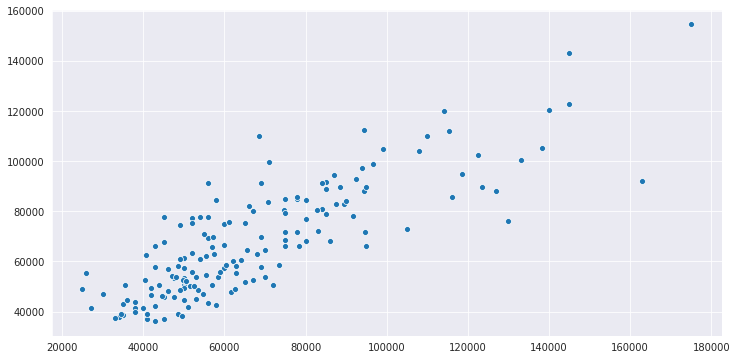

In [29]:
sns.scatterplot(x=y_test, y=sm_predictions)
# sm_predictions

In [30]:
print('MAE :', metrics.mean_absolute_error(y_test, sm_predictions))
print('MSE :', metrics.mean_squared_error(y_test, sm_predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, sm_predictions)))

MAE : 11427.323714728884
MSE : 248100687.98701346
RMSE : 15751.212270394093


# Model Optimization

## Correlated vars

In [31]:
correlation = house.corr()
correlation

,price,area,rooms,bathroom,floors,cellar,air,garage,situation
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.186218,0.453347,0.383302,0.329074
area,0.535796,1.000000,0.151851,0.193833,0.083675,0.047487,0.221765,0.352872,0.234782
rooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.097201,0.160412,0.139117,0.078953
bathroom,0.516719,0.193833,0.373769,1.000000,0.324066,0.102791,0.184955,0.178178,0.064013
floors,0.421190,0.083675,0.407974,0.324066,1.000000,-0.173860,0.296216,0.043412,0.042940
cellar,0.186218,0.047487,0.097201,0.102791,-0.173860,1.000000,0.045248,0.052524,0.228651
air,0.453347,0.221765,0.160412,0.184955,0.296216,0.045248,1.000000,0.156596,0.115626
garage,0.383302,0.352872,0.139117,0.178178,0.043412,0.052524,0.156596,1.000000,0.092364
situation,0.329074,0.234782,0.078953,0.064013,0.042940,0.228651,0.115626,0.092364,1.000000


In [32]:
for row in correlation.index:
    for col in correlation.columns:
        if(row != col and correlation[row][col] > 0.5):
            print(row, col)
# No correlated vars are found

price area
price bathroom
area price
bathroom price


## Removing outliers

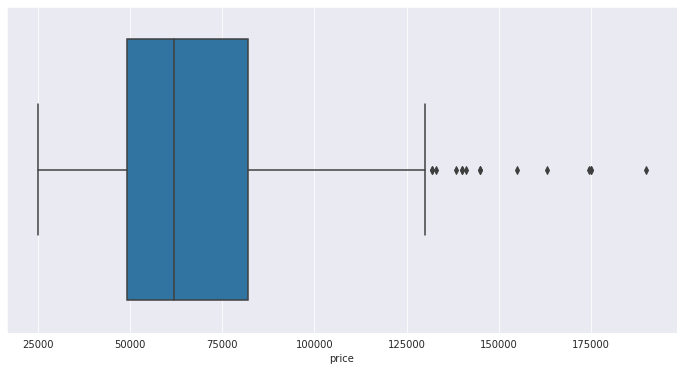

In [33]:
sns.boxplot(house['price'])

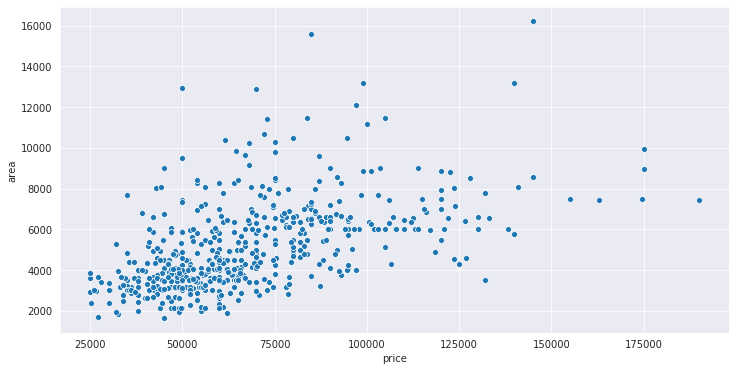

In [34]:
sns.scatterplot(x=house['price'], y=house['area'])

In [36]:
house['situation'].describe()

count    546.000000
mean       0.234432
std        0.424032
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: situation, dtype: float64

### Taking IQR

In [37]:
Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1
threshold_lower = Q1 - (1.5 * IQR)
threshold_upper = Q3 + (1.5 * IQR)

In [38]:
cleaned_house = house[((house > threshold_lower) & (house < threshold_upper)).any(axis=1)]
cleaned_house.head()

,price,area,rooms,bathroom,floors,cellar,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0
1,38500,4000,2,1,1,0,0,0,0
2,49500,3060,3,1,1,0,0,0,0
3,60500,6650,3,1,2,0,0,0,0
4,61000,6360,2,1,1,0,0,0,0


In [39]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
price,546.0,68121.597070,26702.670926,25000.0,49125.0,62000.0,82000.0,190000.0
area,546.0,5150.265568,2168.158725,1650.0,3600.0,4600.0,6360.0,16200.0
rooms,546.0,2.965201,0.737388,1.0,2.0,3.0,3.0,6.0
bathroom,546.0,1.285714,0.502158,1.0,1.0,1.0,2.0,4.0
floors,546.0,1.807692,0.868203,1.0,1.0,2.0,2.0,4.0
cellar,546.0,0.349817,0.477349,0.0,0.0,0.0,1.0,1.0
air,546.0,0.316850,0.465675,0.0,0.0,0.0,1.0,1.0
garage,546.0,0.692308,0.861307,0.0,0.0,0.0,1.0,3.0
situation,546.0,0.234432,0.424032,0.0,0.0,0.0,0.0,1.0


In [40]:
cleaned_house.describe().T

,count,mean,std,min,25%,50%,75%,max
price,546.0,68121.597070,26702.670926,25000.0,49125.0,62000.0,82000.0,190000.0
area,546.0,5150.265568,2168.158725,1650.0,3600.0,4600.0,6360.0,16200.0
rooms,546.0,2.965201,0.737388,1.0,2.0,3.0,3.0,6.0
bathroom,546.0,1.285714,0.502158,1.0,1.0,1.0,2.0,4.0
floors,546.0,1.807692,0.868203,1.0,1.0,2.0,2.0,4.0
cellar,546.0,0.349817,0.477349,0.0,0.0,0.0,1.0,1.0
air,546.0,0.316850,0.465675,0.0,0.0,0.0,1.0,1.0
garage,546.0,0.692308,0.861307,0.0,0.0,0.0,1.0,3.0
situation,546.0,0.234432,0.424032,0.0,0.0,0.0,0.0,1.0


In [41]:
# Test performance in IQR
X = cleaned_house[['area', 'rooms', 'bathroom', 'floors',
       'cellar', 'air', 'garage', 'situation']].values
y = cleaned_house['price'].values


In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_std = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3)

model = constructOLSRegressor(X_train, y_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     99.33
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           1.31e-87
Time:                        09:57:08   Log-Likelihood:                -4232.3
No. Observations:                 382   AIC:                             8483.
Df Residuals:                     373   BIC:                             8518.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.891e+04    814.606     84.587      0.000    6.73e+04    7.05e+04
x1          8753.7225    931.522      9.397      0.000    6922.029    1.06e+04
x2          1342.4809    946.253      1.419      0.157    -518.179    3203.141
x3          7009.7757    919.705      7.622      0.000    5201.318    8818.233
x4          7091.9249    976.698      7.261      0.000    5171.400    9012.450
x5          3216.5080    885.035      3.634      0.000    1476.225    4956.791
x6          5359.0921    861.120      6.223      0.000    3665.833    7052.351
x7          5221.0286    887.942      5.880      0.000    3475.028    6967.029
x8          4538.4138    844.815      5.372      0.000    2877.216    6199.612
==============================================================================
Omnibus:                       55.131   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.474
Skew:                           0.829   Prob(JB):                     2.51e-22
Kurtosis:                       4.870   Cond. No.                         2.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Normalize values
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# X_train = sc.fit_transform(x_train)
# X_train[0:10,:]

In [44]:
# model = constructOLSRegressor(X_train, y_train)
# model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     88.28
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           2.80e-81
Time:                        09:55:59   Log-Likelihood:                -4239.2
No. Observations:                 382   AIC:                             8496.
Df Residuals:                     373   BIC:                             8532.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.859e+04    828.928     82.746      0.000     6.7e+04    7.02e+04
x1          8850.7579    902.824      9.803      0.000    7075.495    1.06e+04
x2          1412.5911    980.964      1.440      0.151    -516.323    3341.505
x3          7672.5183    921.088      8.330      0.000    5861.343    9483.694
x4          5829.5504   1000.356      5.827      0.000    3862.506    7796.595
x5          3500.6348    894.451      3.914      0.000    1741.836    5259.434
x6          5038.0272    887.338      5.678      0.000    3293.215    6782.839
x7          4636.1566    914.780      5.068      0.000    2837.384    6434.929
x8          4582.8146    894.306      5.124      0.000    2824.302    6341.328
==============================================================================
Omnibus:                       58.299   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.856
Skew:                           0.850   Prob(JB):                     8.47e-25
Kurtosis:                       5.018   Cond. No.                         2.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
X_test = sm.add_constant(X_test)
predictions = model.predict(X_test)
predictions

array([ 66283.04007328,  38343.13855354,  81451.36656848,  69370.56365458,
       103655.56122862,  82424.10118456, 100230.03557074,  51755.98035156,
        38054.17948389,  70094.02293161,  60082.55399928,  83583.30276722,
        38506.57445038, 110895.2934746 ,  45274.76064044,  38506.57445038,
        36055.03599769,  48206.99603278,  81655.48768962,  82763.11340356,
        86075.23293887,  67083.41117508,  51689.58399529, 110489.46505608,
        53708.55402229,  75097.15753594,  91832.66637698,  42429.03597468,
        63624.40656209,  57033.59030934,  61094.02225663,  63530.16720897,
        87157.2111501 ,  43894.21260868, 107404.40666251,  87465.22724731,
        69764.24048411,  43599.54269777,  42020.44623257,  59390.86209149,
        49662.130257  ,  69777.98200447,  59096.19218058,  92641.90603383,
        73720.35212294,  61526.59068232,  45648.2022496 , 157111.30885615,
        98068.55813422,  38343.13855354,  87032.98224748,  72323.01845928,
        71696.21561365,  

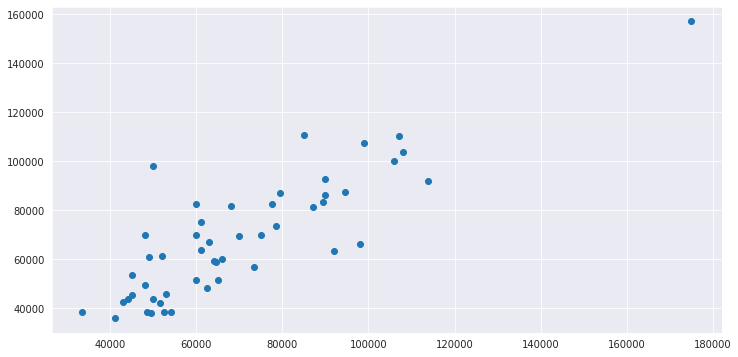

In [46]:
plt.scatter(y_test[:50], predictions[:50])